In [8]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('creditcard_2023.csv')
columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'Class']
df_selected = df[columns]

num_rows, num_columns = df_selected .shape
print(num_rows)
df_limited = df_selected.head(120000)

568630


In [10]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_limited.drop('Class', axis=1))

In [21]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
labels = dbscan.fit_predict(features_scaled)


df_limited['Cluster'] = labels

/tmp/ipykernel_51021/2672773639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limited['Cluster'] = labels


In [22]:
cluster_0_amount = df_limited[df_limited['Cluster'] == 0]['Amount']
other_clusters_amount = df_limited[df_limited['Cluster'] != 0]['Amount']

t_stat, p_value = ttest_ind(cluster_0_amount, other_clusters_amount, equal_var=False)


In [23]:
print("DBSCAN Cluster Counts:")
print(df_limited['Cluster'].value_counts())
print("\nA/B Test Results:")
print(f"t-statistic: {t_stat}, p-value: {p_value}")

DBSCAN Cluster Counts:
Cluster
 0      111474
-1        7058
 20         55
 2          29
 30         25
         ...  
 263         3
 311         3
 299         3
 227         3
 309         3
Name: count, Length: 324, dtype: int64

A/B Test Results:
t-statistic: -1.2248744934160458, p-value: 0.22065194450074924


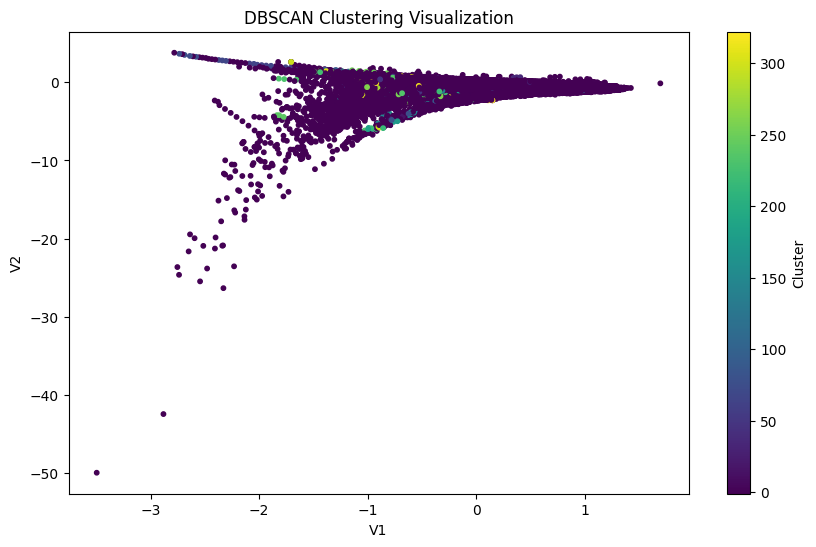

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df_limited['V1'], df_limited['V2'], c=df_limited['Cluster'], cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()